# **From Voice to Verdict: Machine Learning for Truth Detection**

---





Student Name: Sakshi Rahul Kothari

Student ID: 240814654



---





##  Problem Formulation

  The task is to classify audio stories as either true or deceptive using machine learning. This means analyzing the way people speak—their words, tone, pauses, and even subtle nuances—to uncover whether they're being honest or telling a tall tale.
  
  The most interesting thing is - Humans often use cues like tone or hesitation to detect deception—can machines learn this skill? This project explores how models can "read between the lines" of speech to uncover the truth.
   
  The outcome could create tools for verifying truth in interviews, podcasts, or customer interactions, making audio-based communication more transparent and trustworthy.




---



---







## Methodology

--> Preprocessing

It involves preprocessing the audio data to convert it into a suitable format. I have done this by **'Segmentation'** that is splitting long audio files into 30-second segments.

--> Training Task

The model is trained on labeled audio segments, where each segment is tagged as either 'true[1]' or 'deceptive[0]'.

The training task involves: **Feature Selection** and **Model Choice**
 - Using relevant features to train the model by understanding feature importance(using Random Forest), I tried to ensure that I capture the essential characteristics. I experimented with different machine learning models such as Random Forest, Support Vector Machines (SVM), or XGBoost ensemble apporach.

--> Validation Task

I have used **'Cross-Validation'** which performs k-fold cross-validation to ensure that the model is not overfitting to the training data and can generalize well to different subsets of the data.

--> Performance Metrics

**Accuracy:** The proportion of correctly classified audio segments (either true or deceptive).

**Confusion Matrix:** To evaluate false positives, false negatives, true positives, and true negatives.

**Precision, Recall, and F1-Score:** These metrics provide insights into the
model's performance.

--> Model Optimization

I have then chosen **'Grid Search'** to find the optimal hyperparameters for the chosen model.



---

---



## Implemented ML prediction pipelines

This section describes the prediction pipelines implemented for a machine learning project. The pipelines are designed to handle data preprocessing, feature transformation, model inference, and ensemble prediction stages. Each stage is structured to handle specific tasks, ensuring smooth transitions between steps with well-defined input, output, and intermediate formats.

### Overview of the Pipeline Stages  
1. **Data Preprocessing**: Cleans and segments the audio files for uniform input.  
2. **Feature Extraction**: Converts the raw audio into meaningful numerical features like MFCCs and pitch.  
3. **Model Training**: Trains the machine learning model using the extracted features and labeled data.  
4. **Prediction**: Applies the trained model to classify new, unseen audio segments.  
5. **Evaluation**: Assesses the model's performance using standard metrics like accuracy and confusion matrix.

**Data Collection and Pre-Processing Stage**

Objective: Gather raw input data from sources (e.g., MLend Dataset)

**Input and Output**
- **Input**:
  - Audio data: Audio files in `.wav` format.
  - Chunk labels: CSV containing labels for audio chunks.
  - Extracted audio features: CSV file containing computed features for each audio chunk.
- **Output**:
  - Predicted labels for each chunk: Stored in a `CSV` file.
  - Performance metrics (accuracy, precision, recall, F1-score).

---

**Transformation Stage**

This stage involves:
1. **Audio Feature Extraction**:
   - Use libraries like `librosa` to extract features like `power`, `pitch`, `rms_mean`, etc., from each audio chunk.
   - Save extracted features into a CSV for further use.

2. **Data Preprocessing**:
   - Normalize features (e.g., scale using `StandardScaler`).
   - Encode labels if needed (e.g., map `True` -> 1 and `False` -> 0).

3. **Feature Selection**:
   - Utilize feature importance to identify the features that contribute the most to the model's predictions.  
   - Select only the necessary features to optimize the training of the data model.  

##### **Intermediate Data Format** : Processed features and labels are stored as a Pandas DataFrame.

---

**Model Stage**

This stage trains a machine learning model using the processed data:
- **Model Selection**:
  - SVM, Random Forest, or other models suitable for classification tasks.
- **Cross-Validation**:
  - Evaluate the model’s performance using cross-validation.
- **Hyperparameter Tuning**:
  - Conducted grid search to find the best hyperparameters for the model to enhance performance.


---

**Ensemble Stage**


Combined predictions from multiple models to improve accuracy. For example:
- XGBoost to combine models like SVM, KNN, Logistic Regression.

---

**Prediction Stage**

 Use the trained model to predict whether new, unseen audio segments are true or deceptive based on the features extracted during preprocessing and feature extraction.  
- **Input**:
  - Trained model and unseen test data (new audio segments)  
- **Output**:
  - Predicted labels (true or deceptive)

---

**Evaluation Stage**

- **Input**:
  - Predicted labels and ground truth labels (from test data)  
- **Output**:
  - Performance metrics (accuracy, precision, recall, F1-score, confusion matrix)  

##### **Intermediate Data Structures**: Evaluation metrics (confusion matrix)  

---
---

## Dataset



The process begins with downloading the 'mlend' dataset and loading it into the environment.

In [1]:
!pip install mlend==1.0.0.4
import mlend
from mlend import download_deception_small, deception_small_load
datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)



TrainSet, TestSet, MAPs = deception_small_load(datadir_main=datadir,
                                               train_test_split=None,
                                               verbose=1,
                                               encode_labels=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.0 MB/s eta 0:00:00
  Created wheel for python-picard: filename=python_picard-0.8-py3-none-any.whl size=16394 sha256=63058adb0e4b5f7679099116a8b3bd0ebd1a085c5b2ca6f2d92ab0f961906c1c
  Stored in directory: /root/.cache/pip/wheels/d7/2d/9f/cdbaa870f73d637972241ec2213760c7efb6ac88880a19ba91
Successfully built python-picard


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

  1%|                                                  |100\1|00001.wav

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!
Total 100 found in MLEnd/deception/MLEndDD_stories_small/


The next step involves storing the dataset in a DataFrame using the `pandas` library. Initially, the encoding assigned 'true' stories as `0` and 'deceptive' stories as `1`. However, this encoding was later reversed to ensure consistency, with 'true' stories now encoded as `1` and 'deceptive' stories as `0`.



In [2]:
import pandas as pd
data_df=pd.DataFrame(TrainSet)
data_df['Y_encoded'] = data_df['Y_encoded'].replace({0: 1, 1: 0})
print(data_df.head())

                                           X_paths                Y  Y_encoded
0  MLEnd/deception/MLEndDD_stories_small/00001.wav  deceptive_story          0
1  MLEnd/deception/MLEndDD_stories_small/00002.wav       true_story          1
2  MLEnd/deception/MLEndDD_stories_small/00003.wav  deceptive_story          0
3  MLEnd/deception/MLEndDD_stories_small/00004.wav  deceptive_story          0
4  MLEnd/deception/MLEndDD_stories_small/00005.wav  deceptive_story          0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: 

To split the the audio files, we will need 'pydub' which is installed right before the split function.



In [3]:
!pip install pydub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pydub-0.25.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>



- **Segmentation**: Audio files are divided into smaller segments after skipping first 15 seconds of audio to ensure consistent input size.The first 15 seconds of any audio are introductory, just as setting a base for any story (for example: Once upon a time, Far long ago, When I met this person,etc) which I thought might not be as crucial as the middle part of story where the speaker gives minute details or sometimes stutters while describing the story. Hence I chose to skip first 15 seconds and have then used rest of 30 seconds chunks.

In the splitting function, the first 15 seconds of each audio file are skipped, as previously explained. To ensure that the audio chunks are correctly labeled, the labels from the original `ml_dataset_csv` are mapped to the corresponding chunks. These labeled chunks are then stored in a new file, `audio_chunks.csv`, to maintain accurate and organized mapping.

In [4]:
import os
import librosa
import soundfile as sf
from tqdm import tqdm
import math

def splits(input_file, base_output_dir, label, chunk_duration=30, standard_rate=22050, max_chunks=10, skip_duration=15):

    audio, sr = librosa.load(input_file, sr=standard_rate) # Loading the audio file
    total_duration = len(audio) / sr
    skip_samples = int(skip_duration * sr)  # Convert skip duration to samples
    chunk_samples = int(chunk_duration * sr)

    audio = audio[skip_samples:]  # Skip the first 15 seconds of the audio
    effective_duration = max(0, total_duration - skip_duration)  # Effective duration after skipping

    num_chunks = math.ceil(effective_duration / chunk_duration) # Calculates total number of chunks
    print(f"File: {input_file} | Total Duration: {total_duration:.2f}s | Number of Chunks: {num_chunks}")

    # Create the directory
    base_name = os.path.basename(input_file).split('.')[0]
    output_dir = os.path.join(base_output_dir, base_name)
    os.makedirs(output_dir, exist_ok=True)

    # Loop over the chunks
    chunk_labels = []
    for i in range(min(num_chunks, max_chunks)):
        start = i * chunk_samples
        end = start + chunk_samples

        if start < len(audio):
            chunk = audio[start:end]

            chunk_file_name = f"{base_name}_chunk{i + 1}.wav"  # Labelling the chunk file name and path
            chunk_file_path = os.path.join(output_dir, chunk_file_name)
            sf.write(chunk_file_path, chunk, sr)

            chunk_labels.append((chunk_file_name, label)) # Mapping label to chunk

            print(f"  Saved chunk {i + 1} to {chunk_file_path} ({len(chunk) / sr:.2f} seconds)")

    return chunk_labels

base_dir = "audio_chunks"
os.makedirs(base_dir, exist_ok=True)

# Map chunks to labels
chunk_label_mapping = []

print("Processing files:")
for idx, row in tqdm(data_df.iterrows(), total=len(data_df)):
    audio_file = row['X_paths']
    label = row['Y_encoded']
    chunk_labels = splits(audio_file, base_dir, label)
    chunk_label_mapping.extend(chunk_labels)

csv_output_path = "chunk_labels.csv" # Save the mapping into CSV file
mapping_df = pd.DataFrame(chunk_label_mapping, columns=["chunk_file", "label"])
mapping_df.to_csv(csv_output_path, index=False)

print(f"Chunk-label mapping saved to {csv_output_path}.")


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Processing files:


  0%|          | 0/100 [00:00<?, ?it/s]<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; fal

File: MLEnd/deception/MLEndDD_stories_small/00001.wav | Total Duration: 122.17s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00001/00001_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00001/00001_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00001/00001_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00001/00001_chunk4.wav (17.17 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00002.wav | Total Duration: 125.19s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00002/00002_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00002/00002_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00002/00002_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00002/00002_chunk4.wav (20.19 seconds)


  3%|▎         | 3/100 [00:34<12:43,  7.87s/it]

File: MLEnd/deception/MLEndDD_stories_small/00003.wav | Total Duration: 162.98s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00003/00003_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00003/00003_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00003/00003_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00003/00003_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00003/00003_chunk5.wav (27.98 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00004.wav | Total Duration: 121.68s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00004/00004_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00004/00004_chunk2.wav (30.00 seconds)


  4%|▍         | 4/100 [00:34<07:42,  4.81s/it]

  Saved chunk 3 to audio_chunks/00004/00004_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00004/00004_chunk4.wav (16.68 seconds)


  5%|▌         | 5/100 [00:35<05:03,  3.19s/it]

File: MLEnd/deception/MLEndDD_stories_small/00005.wav | Total Duration: 134.19s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00005/00005_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00005/00005_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00005/00005_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00005/00005_chunk4.wav (29.19 seconds)


  6%|▌         | 6/100 [00:35<03:25,  2.19s/it]

File: MLEnd/deception/MLEndDD_stories_small/00006.wav | Total Duration: 111.99s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00006/00006_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00006/00006_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00006/00006_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00006/00006_chunk4.wav (6.99 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00007.wav | Total Duration: 172.67s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00007/00007_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00007/00007_chunk2.wav (30.00 seconds)


  8%|▊         | 8/100 [00:35<01:40,  1.09s/it]

  Saved chunk 3 to audio_chunks/00007/00007_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00007/00007_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00007/00007_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00007/00007_chunk6.wav (7.67 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00008.wav | Total Duration: 118.61s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00008/00008_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00008/00008_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00008/00008_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00008/00008_chunk4.wav (13.61 seconds)


  9%|▉         | 9/100 [00:36<01:18,  1.16it/s]

File: MLEnd/deception/MLEndDD_stories_small/00009.wav | Total Duration: 156.91s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00009/00009_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00009/00009_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00009/00009_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00009/00009_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00009/00009_chunk5.wav (21.91 seconds)


 10%|█         | 10/100 [00:36<01:07,  1.33it/s]

File: MLEnd/deception/MLEndDD_stories_small/00010.wav | Total Duration: 214.51s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00010/00010_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00010/00010_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00010/00010_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00010/00010_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00010/00010_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00010/00010_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00010/00010_chunk7.wav (19.51 seconds)


 11%|█         | 11/100 [00:37<00:57,  1.54it/s]

File: MLEnd/deception/MLEndDD_stories_small/00011.wav | Total Duration: 179.98s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00011/00011_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00011/00011_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00011/00011_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00011/00011_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00011/00011_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00011/00011_chunk6.wav (14.98 seconds)


 13%|█▎        | 13/100 [00:37<00:36,  2.38it/s]

File: MLEnd/deception/MLEndDD_stories_small/00012.wav | Total Duration: 147.93s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00012/00012_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00012/00012_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00012/00012_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00012/00012_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00012/00012_chunk5.wav (12.93 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00013.wav | Total Duration: 111.56s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00013/00013_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00013/00013_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00013/00013_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00013/00013_chunk4.wav (6.56 seconds)


 14%|█▍        | 14/100 [00:37<00:37,  2.32it/s]

File: MLEnd/deception/MLEndDD_stories_small/00014.wav | Total Duration: 202.37s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00014/00014_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00014/00014_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00014/00014_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00014/00014_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00014/00014_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00014/00014_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00014/00014_chunk7.wav (7.37 seconds)


 15%|█▌        | 15/100 [00:38<00:32,  2.61it/s]

File: MLEnd/deception/MLEndDD_stories_small/00015.wav | Total Duration: 114.03s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00015/00015_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00015/00015_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00015/00015_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00015/00015_chunk4.wav (9.03 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00016.wav | Total Duration: 185.86s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00016/00016_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00016/00016_chunk2.wav (30.00 seconds)


 16%|█▌        | 16/100 [00:38<00:27,  3.04it/s]

  Saved chunk 3 to audio_chunks/00016/00016_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00016/00016_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00016/00016_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00016/00016_chunk6.wav (20.86 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00017.wav | Total Duration: 155.37s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00017/00017_chunk1.wav (30.00 seconds)


 17%|█▋        | 17/100 [00:38<00:24,  3.32it/s]

  Saved chunk 2 to audio_chunks/00017/00017_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00017/00017_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00017/00017_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00017/00017_chunk5.wav (20.37 seconds)


 18%|█▊        | 18/100 [00:39<00:26,  3.06it/s]

File: MLEnd/deception/MLEndDD_stories_small/00018.wav | Total Duration: 138.88s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00018/00018_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00018/00018_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00018/00018_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00018/00018_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00018/00018_chunk5.wav (3.88 seconds)


 19%|█▉        | 19/100 [00:39<00:23,  3.45it/s]

File: MLEnd/deception/MLEndDD_stories_small/00019.wav | Total Duration: 125.35s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00019/00019_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00019/00019_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00019/00019_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00019/00019_chunk4.wav (20.35 seconds)


 20%|██        | 20/100 [00:39<00:21,  3.73it/s]

File: MLEnd/deception/MLEndDD_stories_small/00020.wav | Total Duration: 144.34s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00020/00020_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00020/00020_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00020/00020_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00020/00020_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00020/00020_chunk5.wav (9.34 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00021.wav | Total Duration: 124.08s | Number of Chunks: 4


 21%|██        | 21/100 [00:39<00:19,  4.14it/s]

  Saved chunk 1 to audio_chunks/00021/00021_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00021/00021_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00021/00021_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00021/00021_chunk4.wav (19.08 seconds)


 22%|██▏       | 22/100 [00:39<00:20,  3.85it/s]

File: MLEnd/deception/MLEndDD_stories_small/00022.wav | Total Duration: 196.38s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00022/00022_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00022/00022_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00022/00022_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00022/00022_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00022/00022_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00022/00022_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00022/00022_chunk7.wav (1.38 seconds)


 23%|██▎       | 23/100 [00:40<00:22,  3.47it/s]

File: MLEnd/deception/MLEndDD_stories_small/00023.wav | Total Duration: 213.10s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00023/00023_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00023/00023_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00023/00023_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00023/00023_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00023/00023_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00023/00023_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00023/00023_chunk7.wav (18.10 seconds)


 24%|██▍       | 24/100 [00:40<00:23,  3.26it/s]

File: MLEnd/deception/MLEndDD_stories_small/00024.wav | Total Duration: 122.10s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00024/00024_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00024/00024_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00024/00024_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00024/00024_chunk4.wav (17.10 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00025.wav | Total Duration: 78.09s | Number of Chunks: 3
  Saved chunk 1 to audio_chunks/00025/00025_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00025/00025_chunk2.wav (30.00 seconds)


 25%|██▌       | 25/100 [00:40<00:18,  4.00it/s]

  Saved chunk 3 to audio_chunks/00025/00025_chunk3.wav (3.09 seconds)


 26%|██▌       | 26/100 [00:41<00:22,  3.32it/s]

File: MLEnd/deception/MLEndDD_stories_small/00026.wav | Total Duration: 144.65s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00026/00026_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00026/00026_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00026/00026_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00026/00026_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00026/00026_chunk5.wav (9.65 seconds)


 27%|██▋       | 27/100 [00:41<00:27,  2.68it/s]

File: MLEnd/deception/MLEndDD_stories_small/00027.wav | Total Duration: 177.39s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00027/00027_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00027/00027_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00027/00027_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00027/00027_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00027/00027_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00027/00027_chunk6.wav (12.39 seconds)


 28%|██▊       | 28/100 [00:42<00:27,  2.62it/s]

File: MLEnd/deception/MLEndDD_stories_small/00028.wav | Total Duration: 153.21s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00028/00028_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00028/00028_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00028/00028_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00028/00028_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00028/00028_chunk5.wav (18.21 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00029.wav | Total Duration: 130.37s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00029/00029_chunk1.wav (30.00 seconds)


 29%|██▉       | 29/100 [00:42<00:22,  3.20it/s]

  Saved chunk 2 to audio_chunks/00029/00029_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00029/00029_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00029/00029_chunk4.wav (25.37 seconds)


 30%|███       | 30/100 [00:42<00:22,  3.09it/s]

File: MLEnd/deception/MLEndDD_stories_small/00030.wav | Total Duration: 155.93s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00030/00030_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00030/00030_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00030/00030_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00030/00030_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00030/00030_chunk5.wav (20.93 seconds)


 31%|███       | 31/100 [00:42<00:21,  3.27it/s]

File: MLEnd/deception/MLEndDD_stories_small/00031.wav | Total Duration: 121.33s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00031/00031_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00031/00031_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00031/00031_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00031/00031_chunk4.wav (16.33 seconds)


 32%|███▏      | 32/100 [00:43<00:22,  3.07it/s]

File: MLEnd/deception/MLEndDD_stories_small/00032.wav | Total Duration: 163.73s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00032/00032_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00032/00032_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00032/00032_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00032/00032_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00032/00032_chunk5.wav (28.73 seconds)


 33%|███▎      | 33/100 [00:43<00:22,  2.92it/s]

File: MLEnd/deception/MLEndDD_stories_small/00033.wav | Total Duration: 168.99s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00033/00033_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00033/00033_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00033/00033_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00033/00033_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00033/00033_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00033/00033_chunk6.wav (3.99 seconds)


 34%|███▍      | 34/100 [00:43<00:20,  3.20it/s]

File: MLEnd/deception/MLEndDD_stories_small/00034.wav | Total Duration: 114.23s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00034/00034_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00034/00034_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00034/00034_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00034/00034_chunk4.wav (9.23 seconds)


 35%|███▌      | 35/100 [00:44<00:20,  3.15it/s]

File: MLEnd/deception/MLEndDD_stories_small/00035.wav | Total Duration: 149.92s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00035/00035_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00035/00035_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00035/00035_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00035/00035_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00035/00035_chunk5.wav (14.92 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00036.wav | Total Duration: 176.55s | Number of Chunks: 6


 36%|███▌      | 36/100 [00:44<00:18,  3.48it/s]

  Saved chunk 1 to audio_chunks/00036/00036_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00036/00036_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00036/00036_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00036/00036_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00036/00036_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00036/00036_chunk6.wav (11.55 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00037.wav | Total Duration: 105.69s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00037/00037_chunk1.wav (30.00 seconds)


 38%|███▊      | 38/100 [00:44<00:12,  4.83it/s]

  Saved chunk 2 to audio_chunks/00037/00037_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00037/00037_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00037/00037_chunk4.wav (0.69 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00038.wav | Total Duration: 115.38s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00038/00038_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00038/00038_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00038/00038_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00038/00038_chunk4.wav (10.38 seconds)


 39%|███▉      | 39/100 [00:44<00:14,  4.25it/s]

File: MLEnd/deception/MLEndDD_stories_small/00039.wav | Total Duration: 136.84s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00039/00039_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00039/00039_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00039/00039_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00039/00039_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00039/00039_chunk5.wav (1.84 seconds)


 41%|████      | 41/100 [00:45<00:12,  4.81it/s]

File: MLEnd/deception/MLEndDD_stories_small/00040.wav | Total Duration: 112.09s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00040/00040_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00040/00040_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00040/00040_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00040/00040_chunk4.wav (7.09 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00041.wav | Total Duration: 112.25s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00041/00041_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00041/00041_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00041/00041_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00041/00041_chunk4.wav (7.25 seconds)


 42%|████▏     | 42/100 [00:45<00:13,  4.32it/s]

File: MLEnd/deception/MLEndDD_stories_small/00042.wav | Total Duration: 129.15s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00042/00042_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00042/00042_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00042/00042_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00042/00042_chunk4.wav (24.15 seconds)


 43%|████▎     | 43/100 [00:45<00:13,  4.07it/s]

File: MLEnd/deception/MLEndDD_stories_small/00043.wav | Total Duration: 247.58s | Number of Chunks: 8
  Saved chunk 1 to audio_chunks/00043/00043_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00043/00043_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00043/00043_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00043/00043_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00043/00043_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00043/00043_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00043/00043_chunk7.wav (30.00 seconds)
  Saved chunk 8 to audio_chunks/00043/00043_chunk8.wav (22.58 seconds)


 44%|████▍     | 44/100 [00:46<00:12,  4.40it/s]

File: MLEnd/deception/MLEndDD_stories_small/00044.wav | Total Duration: 160.78s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00044/00044_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00044/00044_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00044/00044_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00044/00044_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00044/00044_chunk5.wav (25.78 seconds)


 45%|████▌     | 45/100 [00:46<00:13,  4.05it/s]

File: MLEnd/deception/MLEndDD_stories_small/00045.wav | Total Duration: 128.54s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00045/00045_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00045/00045_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00045/00045_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00045/00045_chunk4.wav (23.54 seconds)


 47%|████▋     | 47/100 [00:46<00:11,  4.61it/s]

File: MLEnd/deception/MLEndDD_stories_small/00046.wav | Total Duration: 115.57s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00046/00046_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00046/00046_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00046/00046_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00046/00046_chunk4.wav (10.57 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00047.wav | Total Duration: 134.57s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00047/00047_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00047/00047_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00047/00047_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00047/00047_chunk4.wav (29.57 seconds)


 48%|████▊     | 48/100 [00:47<00:13,  3.87it/s]

File: MLEnd/deception/MLEndDD_stories_small/00048.wav | Total Duration: 160.82s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00048/00048_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00048/00048_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00048/00048_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00048/00048_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00048/00048_chunk5.wav (25.82 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00049.wav | Total Duration: 112.61s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00049/00049_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00049/00049_chunk2.wav (30.00 seconds)


 49%|████▉     | 49/100 [00:47<00:11,  4.59it/s]

  Saved chunk 3 to audio_chunks/00049/00049_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00049/00049_chunk4.wav (7.61 seconds)


 50%|█████     | 50/100 [00:47<00:13,  3.81it/s]

File: MLEnd/deception/MLEndDD_stories_small/00050.wav | Total Duration: 162.07s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00050/00050_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00050/00050_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00050/00050_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00050/00050_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00050/00050_chunk5.wav (27.07 seconds)


 51%|█████     | 51/100 [00:47<00:13,  3.72it/s]

File: MLEnd/deception/MLEndDD_stories_small/00051.wav | Total Duration: 130.07s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00051/00051_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00051/00051_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00051/00051_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00051/00051_chunk4.wav (25.07 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00052.wav | Total Duration: 119.55s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00052/00052_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00052/00052_chunk2.wav (30.00 seconds)


 52%|█████▏    | 52/100 [00:48<00:11,  4.33it/s]

  Saved chunk 3 to audio_chunks/00052/00052_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00052/00052_chunk4.wav (14.55 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00053.wav | Total Duration: 198.42s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00053/00053_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00053/00053_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00053/00053_chunk3.wav (30.00 seconds)


 53%|█████▎    | 53/100 [00:48<00:11,  4.26it/s]

  Saved chunk 4 to audio_chunks/00053/00053_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00053/00053_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00053/00053_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00053/00053_chunk7.wav (3.42 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00054.wav | Total Duration: 132.30s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00054/00054_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00054/00054_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00054/00054_chunk3.wav (30.00 seconds)


 54%|█████▍    | 54/100 [00:48<00:09,  4.73it/s]

  Saved chunk 4 to audio_chunks/00054/00054_chunk4.wav (27.30 seconds)


 55%|█████▌    | 55/100 [00:48<00:10,  4.14it/s]

File: MLEnd/deception/MLEndDD_stories_small/00055.wav | Total Duration: 136.33s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00055/00055_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00055/00055_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00055/00055_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00055/00055_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00055/00055_chunk5.wav (1.33 seconds)


 57%|█████▋    | 57/100 [00:49<00:09,  4.69it/s]

File: MLEnd/deception/MLEndDD_stories_small/00056.wav | Total Duration: 135.56s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00056/00056_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00056/00056_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00056/00056_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00056/00056_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00056/00056_chunk5.wav (0.56 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00057.wav | Total Duration: 94.96s | Number of Chunks: 3
  Saved chunk 1 to audio_chunks/00057/00057_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00057/00057_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00057/00057_chunk3.wav (19.96 seconds)


 58%|█████▊    | 58/100 [00:49<00:08,  5.17it/s]

File: MLEnd/deception/MLEndDD_stories_small/00058.wav | Total Duration: 133.77s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00058/00058_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00058/00058_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00058/00058_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00058/00058_chunk4.wav (28.77 seconds)


 59%|█████▉    | 59/100 [00:49<00:10,  3.74it/s]

File: MLEnd/deception/MLEndDD_stories_small/00059.wav | Total Duration: 190.80s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00059/00059_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00059/00059_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00059/00059_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00059/00059_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00059/00059_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00059/00059_chunk6.wav (25.80 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00060.wav | Total Duration: 129.52s | Number of Chunks: 4


 61%|██████    | 61/100 [00:50<00:07,  5.09it/s]

  Saved chunk 1 to audio_chunks/00060/00060_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00060/00060_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00060/00060_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00060/00060_chunk4.wav (24.52 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00061.wav | Total Duration: 115.77s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00061/00061_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00061/00061_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00061/00061_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00061/00061_chunk4.wav (10.77 seconds)


 62%|██████▏   | 62/100 [00:50<00:09,  3.96it/s]

File: MLEnd/deception/MLEndDD_stories_small/00062.wav | Total Duration: 169.15s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00062/00062_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00062/00062_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00062/00062_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00062/00062_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00062/00062_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00062/00062_chunk6.wav (4.15 seconds)


 63%|██████▎   | 63/100 [00:50<00:11,  3.13it/s]

File: MLEnd/deception/MLEndDD_stories_small/00063.wav | Total Duration: 205.50s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00063/00063_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00063/00063_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00063/00063_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00063/00063_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00063/00063_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00063/00063_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00063/00063_chunk7.wav (10.50 seconds)


 65%|██████▌   | 65/100 [00:51<00:09,  3.85it/s]

File: MLEnd/deception/MLEndDD_stories_small/00064.wav | Total Duration: 134.73s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00064/00064_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00064/00064_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00064/00064_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00064/00064_chunk4.wav (29.73 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00065.wav | Total Duration: 125.34s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00065/00065_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00065/00065_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00065/00065_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00065/00065_chunk4.wav (20.34 seconds)


 67%|██████▋   | 67/100 [00:51<00:07,  4.45it/s]

File: MLEnd/deception/MLEndDD_stories_small/00066.wav | Total Duration: 124.92s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00066/00066_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00066/00066_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00066/00066_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00066/00066_chunk4.wav (19.92 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00067.wav | Total Duration: 110.46s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00067/00067_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00067/00067_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00067/00067_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00067/00067_chunk4.wav (5.46 seconds)


 68%|██████▊   | 68/100 [00:52<00:07,  4.21it/s]

File: MLEnd/deception/MLEndDD_stories_small/00068.wav | Total Duration: 112.53s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00068/00068_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00068/00068_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00068/00068_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00068/00068_chunk4.wav (7.53 seconds)


 69%|██████▉   | 69/100 [00:52<00:09,  3.41it/s]

File: MLEnd/deception/MLEndDD_stories_small/00069.wav | Total Duration: 141.27s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00069/00069_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00069/00069_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00069/00069_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00069/00069_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00069/00069_chunk5.wav (6.27 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00070.wav | Total Duration: 139.06s | Number of Chunks: 5


 70%|███████   | 70/100 [00:52<00:08,  3.74it/s]

  Saved chunk 1 to audio_chunks/00070/00070_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00070/00070_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00070/00070_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00070/00070_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00070/00070_chunk5.wav (4.06 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00071.wav | Total Duration: 116.74s | Number of Chunks: 4


 71%|███████   | 71/100 [00:52<00:06,  4.24it/s]

  Saved chunk 1 to audio_chunks/00071/00071_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00071/00071_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00071/00071_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00071/00071_chunk4.wav (11.74 seconds)


 72%|███████▏  | 72/100 [00:53<00:07,  3.67it/s]

File: MLEnd/deception/MLEndDD_stories_small/00072.wav | Total Duration: 126.11s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00072/00072_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00072/00072_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00072/00072_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00072/00072_chunk4.wav (21.11 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00073.wav | Total Duration: 115.05s | Number of Chunks: 4


 73%|███████▎  | 73/100 [00:53<00:06,  4.02it/s]

  Saved chunk 1 to audio_chunks/00073/00073_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00073/00073_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00073/00073_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00073/00073_chunk4.wav (10.05 seconds)


 74%|███████▍  | 74/100 [00:53<00:07,  3.49it/s]

File: MLEnd/deception/MLEndDD_stories_small/00074.wav | Total Duration: 128.17s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00074/00074_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00074/00074_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00074/00074_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00074/00074_chunk4.wav (23.17 seconds)


 75%|███████▌  | 75/100 [00:54<00:09,  2.60it/s]

File: MLEnd/deception/MLEndDD_stories_small/00075.wav | Total Duration: 199.68s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00075/00075_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00075/00075_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00075/00075_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00075/00075_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00075/00075_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00075/00075_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00075/00075_chunk7.wav (4.68 seconds)


 76%|███████▌  | 76/100 [00:54<00:07,  3.06it/s]

File: MLEnd/deception/MLEndDD_stories_small/00076.wav | Total Duration: 120.34s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00076/00076_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00076/00076_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00076/00076_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00076/00076_chunk4.wav (15.34 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00077.wav | Total Duration: 125.30s | Number of Chunks: 4


 77%|███████▋  | 77/100 [00:54<00:06,  3.51it/s]

  Saved chunk 1 to audio_chunks/00077/00077_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00077/00077_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00077/00077_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00077/00077_chunk4.wav (20.30 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00078.wav | Total Duration: 142.42s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00078/00078_chunk1.wav (30.00 seconds)


 78%|███████▊  | 78/100 [00:54<00:05,  3.79it/s]

  Saved chunk 2 to audio_chunks/00078/00078_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00078/00078_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00078/00078_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00078/00078_chunk5.wav (7.42 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00079.wav | Total Duration: 221.87s | Number of Chunks: 7
  Saved chunk 1 to audio_chunks/00079/00079_chunk1.wav (30.00 seconds)


 79%|███████▉  | 79/100 [00:55<00:05,  3.78it/s]

  Saved chunk 2 to audio_chunks/00079/00079_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00079/00079_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00079/00079_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00079/00079_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00079/00079_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00079/00079_chunk7.wav (26.87 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00080.wav | Total Duration: 43.37s | Number of Chunks: 1
  Saved chunk 1 to audio_chunks/00080/00080_chunk1.wav (28.37 seconds)


 82%|████████▏ | 82/100 [00:55<00:03,  4.95it/s]

File: MLEnd/deception/MLEndDD_stories_small/00081.wav | Total Duration: 124.43s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00081/00081_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00081/00081_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00081/00081_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00081/00081_chunk4.wav (19.43 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00082.wav | Total Duration: 115.04s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00082/00082_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00082/00082_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00082/00082_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00082/00082_chunk4.wav (10.04 seconds)


 83%|████████▎ | 83/100 [00:56<00:03,  4.30it/s]

File: MLEnd/deception/MLEndDD_stories_small/00083.wav | Total Duration: 140.28s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00083/00083_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00083/00083_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00083/00083_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00083/00083_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00083/00083_chunk5.wav (5.28 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00084.wav | Total Duration: 141.15s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00084/00084_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00084/00084_chunk2.wav (30.00 seconds)


 85%|████████▌ | 85/100 [00:56<00:02,  5.08it/s]

  Saved chunk 3 to audio_chunks/00084/00084_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00084/00084_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00084/00084_chunk5.wav (6.15 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00085.wav | Total Duration: 149.57s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00085/00085_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00085/00085_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00085/00085_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00085/00085_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00085/00085_chunk5.wav (14.57 seconds)


 86%|████████▌ | 86/100 [00:56<00:02,  5.50it/s]

File: MLEnd/deception/MLEndDD_stories_small/00086.wav | Total Duration: 125.57s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00086/00086_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00086/00086_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00086/00086_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00086/00086_chunk4.wav (20.57 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00087.wav | Total Duration: 144.54s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00087/00087_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00087/00087_chunk2.wav (30.00 seconds)


 88%|████████▊ | 88/100 [00:56<00:01,  6.10it/s]

  Saved chunk 3 to audio_chunks/00087/00087_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00087/00087_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00087/00087_chunk5.wav (9.54 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00088.wav | Total Duration: 126.13s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00088/00088_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00088/00088_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00088/00088_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00088/00088_chunk4.wav (21.13 seconds)


 89%|████████▉ | 89/100 [00:57<00:02,  4.83it/s]

File: MLEnd/deception/MLEndDD_stories_small/00089.wav | Total Duration: 142.02s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00089/00089_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00089/00089_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00089/00089_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00089/00089_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00089/00089_chunk5.wav (7.02 seconds)


 90%|█████████ | 90/100 [00:57<00:02,  4.32it/s]

File: MLEnd/deception/MLEndDD_stories_small/00090.wav | Total Duration: 120.01s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00090/00090_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00090/00090_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00090/00090_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00090/00090_chunk4.wav (15.01 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00091.wav | Total Duration: 214.25s | Number of Chunks: 7


 91%|█████████ | 91/100 [00:57<00:02,  4.28it/s]

  Saved chunk 1 to audio_chunks/00091/00091_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00091/00091_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00091/00091_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00091/00091_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00091/00091_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00091/00091_chunk6.wav (30.00 seconds)
  Saved chunk 7 to audio_chunks/00091/00091_chunk7.wav (19.25 seconds)


 92%|█████████▏| 92/100 [00:57<00:02,  3.90it/s]

File: MLEnd/deception/MLEndDD_stories_small/00092.wav | Total Duration: 129.42s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00092/00092_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00092/00092_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00092/00092_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00092/00092_chunk4.wav (24.42 seconds)


 93%|█████████▎| 93/100 [00:58<00:01,  3.84it/s]

File: MLEnd/deception/MLEndDD_stories_small/00093.wav | Total Duration: 119.49s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00093/00093_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00093/00093_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00093/00093_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00093/00093_chunk4.wav (14.49 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00094.wav | Total Duration: 145.04s | Number of Chunks: 5
  Saved chunk 1 to audio_chunks/00094/00094_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00094/00094_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00094/00094_chunk3.wav (30.00 seconds)


 94%|█████████▍| 94/100 [00:58<00:01,  4.36it/s]

  Saved chunk 4 to audio_chunks/00094/00094_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00094/00094_chunk5.wav (10.04 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00095.wav | Total Duration: 111.58s | Number of Chunks: 4


 95%|█████████▌| 95/100 [00:58<00:01,  4.28it/s]

  Saved chunk 1 to audio_chunks/00095/00095_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00095/00095_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00095/00095_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00095/00095_chunk4.wav (6.58 seconds)


 96%|█████████▌| 96/100 [00:58<00:00,  4.19it/s]

File: MLEnd/deception/MLEndDD_stories_small/00096.wav | Total Duration: 111.51s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00096/00096_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00096/00096_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00096/00096_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00096/00096_chunk4.wav (6.51 seconds)


 97%|█████████▋| 97/100 [00:59<00:00,  3.39it/s]

File: MLEnd/deception/MLEndDD_stories_small/00097.wav | Total Duration: 185.73s | Number of Chunks: 6
  Saved chunk 1 to audio_chunks/00097/00097_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00097/00097_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00097/00097_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00097/00097_chunk4.wav (30.00 seconds)
  Saved chunk 5 to audio_chunks/00097/00097_chunk5.wav (30.00 seconds)
  Saved chunk 6 to audio_chunks/00097/00097_chunk6.wav (20.73 seconds)


 98%|█████████▊| 98/100 [00:59<00:00,  3.40it/s]

File: MLEnd/deception/MLEndDD_stories_small/00098.wav | Total Duration: 128.25s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00098/00098_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00098/00098_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00098/00098_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00098/00098_chunk4.wav (23.25 seconds)


 99%|█████████▉| 99/100 [00:59<00:00,  3.38it/s]

File: MLEnd/deception/MLEndDD_stories_small/00099.wav | Total Duration: 132.41s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00099/00099_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00099/00099_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00099/00099_chunk3.wav (30.00 seconds)
  Saved chunk 4 to audio_chunks/00099/00099_chunk4.wav (27.41 seconds)
File: MLEnd/deception/MLEndDD_stories_small/00100.wav | Total Duration: 123.27s | Number of Chunks: 4
  Saved chunk 1 to audio_chunks/00100/00100_chunk1.wav (30.00 seconds)
  Saved chunk 2 to audio_chunks/00100/00100_chunk2.wav (30.00 seconds)
  Saved chunk 3 to audio_chunks/00100/00100_chunk3.wav (30.00 seconds)


100%|██████████| 100/100 [01:00<00:00,  1.67it/s]

  Saved chunk 4 to audio_chunks/00100/00100_chunk4.wav (18.27 seconds)
Chunk-label mapping saved to chunk_labels.csv.


Next, The number of chunks per audio file are calculated to verify and understand the splitting process.

In [5]:
import os

base_dir = "audio_chunks"

def count_chunks(dir):
    chunk_counts = {}
    for folder in os.listdir(dir):
        folder_path = os.path.join(dir, folder)
        if os.path.isdir(folder_path):  # Ensuring if it's a directory
            chunk_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')] # Counting
            chunk_counts[folder] = len(chunk_files)
    return chunk_counts

chunk_counts = count_chunks(base_dir) # Chunk count for each audio file
print(f"Total chunks in {base_dir}:\n")

for audio_file, count in chunk_counts.items():
    print(f"{audio_file}.wav : {count}")

Total chunks in audio_chunks:

00063.wav : 7
00096.wav : 4
00087.wav : 5
00079.wav : 7
00061.wav : 4
00013.wav : 4
00100.wav : 4
00007.wav : 6
00008.wav : 4
00046.wav : 4
00067.wav : 4
00076.wav : 4
00027.wav : 6
00011.wav : 6
00031.wav : 4
00009.wav : 5
00047.wav : 4
00093.wav : 4
00080.wav : 1
00044.wav : 5
00006.wav : 4
00032.wav : 5
00003.wav : 5
00098.wav : 4
00057.wav : 3
00075.wav : 7
00088.wav : 4
00074.wav : 4
00094.wav : 5
00056.wav : 5
00005.wav : 4
00028.wav : 5
00023.wav : 7
00071.wav : 4
00083.wav : 5
00085.wav : 5
00064.wav : 4
00021.wav : 4
00097.wav : 6
00086.wav : 4
00033.wav : 6
00065.wav : 4
00037.wav : 4
00092.wav : 4
00073.wav : 4
00089.wav : 5
00099.wav : 4
00022.wav : 7
00024.wav : 4
00077.wav : 4
00051.wav : 4
00090.wav : 4
00054.wav : 4
00050.wav : 5
00016.wav : 6
00045.wav : 4
00035.wav : 5
00084.wav : 5
00015.wav : 4
00081.wav : 4
00048.wav : 5
00014.wav : 7
00004.wav : 4
00072.wav : 4
00082.wav : 4
00041.wav : 4
00078.wav : 5
00039.wav : 5
00058.wav : 4
000


### Feature Extraction Stage  
**Input**: Preprocessed audio segments  
**Output**: Extracted features (e.g., MFCCs, pitch, power, RMS, ZCR)   

**Description**:  
Have chosen these features:
- **MFCC (Mel-frequency cepstral coefficients)**: They are crucial for speech recognition and capturing spectral features of speech.  
- **Pitch and Tone Analysis**: Measure to identify voice modulations linked to truth or deception.  
- **Power**: Measure the energy or strength of the sound wave over time.
- **Zero Rate**: Measures the rate at which the audio signal changes sign. Useful for detecting voiced vs. unvoiced signals.
- **RMS**: Measures the root mean square of the signal amplitude, indicating loudness.


To calculate `pitch` we write a seperate function called `compute_pitch` which takes in audio and sample rate as input and returns pitch values.

In [6]:
import librosa
import numpy as np

def compute_pitch(audio, sr):
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()
        pitch_values.append(pitches[index, t])

    pitch_values = [p for p in pitch_values if p > 0] # Filtering out zero-pitch values

    return np.mean(pitch_values) if pitch_values else 0  # Return 0 if no pitch is detected

We use the `extract_features` function to extract features and compute their mean values as aggregates. The process is wrapped in `try-except` blocks for better error handling.

In [8]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=44100)  # Standardizing to 44.1kHz

        # Extract features
        pitch = compute_pitch(audio, sr)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        zcr = librosa.feature.zero_crossing_rate(audio)
        rms = librosa.feature.rms(y=audio)
        power = np.sum(audio ** 2) / len(audio)

        # Aggregate features
        features = {
            "file_path": file_path,
            "power": np.mean(power),
            "pitch": pitch,
            "mfcc_mean": np.mean(mfccs),
            "zcr_mean": np.mean(zcr),
            "rms_mean" : np.mean(rms)
        }
        return features

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


Next, we use the `process_chunks` function to extract features from each audio chunk and store them in the `features_df` DataFrame. The output is also saved as a `audio_features.csv` file for cross-verification.

In [9]:
def process_chunks(base_dir, output_csv):
    data = []
    print(f"Extracting features from chunks in: {base_dir}\n")

    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):  # Ensuring if it's a directory
            for file in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"): #Iterating through files
                file_path = os.path.join(folder_path, file)
                if os.path.isfile(file_path) and file.endswith(".wav"):
                    features = extract_features(file_path)
                    if features:
                        data.append(features)

    features_df = pd.DataFrame(data)
    features_df.to_csv(output_csv, index=False) #Saving in csv file
    print(f"\nFeature extraction completed. Saved to '{output_csv}'.")

process_chunks(base_dir, "audio_features.csv")

Extracting features from chunks in: audio_chunks



Processing audio_chunks/00063:   0%|          | 0/7 [00:00<?, ?it/s]<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHo


Feature extraction completed. Saved to 'audio_features.csv'.


### Model Stage  

**Description**:  
- **Feature Visualization**: Various features of the model are plotted to visually inspect and understand their distribution and relationships.

- **Feature Importance**: The `Random Forest` model is used to determine the importance of each feature, helping identify which features are most relevant for the model.

The first step is to extract features and labels from the respective CSV files and merge them. For analysis, the first four chunks are selected:

- **Chunk 1**: 15 seconds - 45 seconds
- **Chunk 2**: 45 seconds - 1:15 minutes
- **Chunk 3**: 1:15 minutes - 1:45 minutes
- **Chunk 4**: 1:45 minutes - 2:15 minutes

These chunks are chosen to capture variations in voice, stuttering, and extended pauses. The extra 15 seconds in the audio are crucial for understanding how the story concludes or if there are any additions that signal whether the story is true or false.

In [10]:
import pandas as pd
import os

feature_df = pd.read_csv('audio_features.csv')
chunk_df = pd.read_csv('chunk_labels.csv')

feature_df['chunk_file'] = feature_df['file_path'].apply(lambda x: os.path.basename(x))
feature_df = feature_df.merge(chunk_df[['chunk_file', 'label']], on='chunk_file', how='left') # Merge

feature_df['chunk_number'] = feature_df['chunk_file'].str.extract(r'chunk(\d+)').astype(int) # Extract chunk number from chunk_file
features_df = feature_df[feature_df['chunk_number'].isin([1, 2, 3, 4])] # Select only first 4 chunks
features_df = features_df.reset_index(drop=True)

print(features_df.head(5))

                             file_path     power      pitch  mfcc_mean  \
0  audio_chunks/00063/00063_chunk1.wav  0.000347  724.02220 -38.174860   
1  audio_chunks/00063/00063_chunk2.wav  0.000249  753.69560 -38.477340   
2  audio_chunks/00063/00063_chunk3.wav  0.000191  742.27110 -39.815365   
3  audio_chunks/00063/00063_chunk4.wav  0.000397  765.07910 -38.118538   
4  audio_chunks/00096/00096_chunk2.wav  0.000503  418.81354 -20.659088   

   zcr_mean  rms_mean        chunk_file  label  chunk_number  
0  0.072853  0.012943  00063_chunk1.wav      1             1  
1  0.084015  0.011526  00063_chunk2.wav      1             2  
2  0.081483  0.009526  00063_chunk3.wav      1             3  
3  0.086158  0.013273  00063_chunk4.wav      1             4  
4  0.038244  0.016135  00096_chunk2.wav      0             2  


We use the `seaborn` and `matplotlib` libraries to create a pairplot,  colour coded by label, which helps in analyzing the relationships between the features.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: 

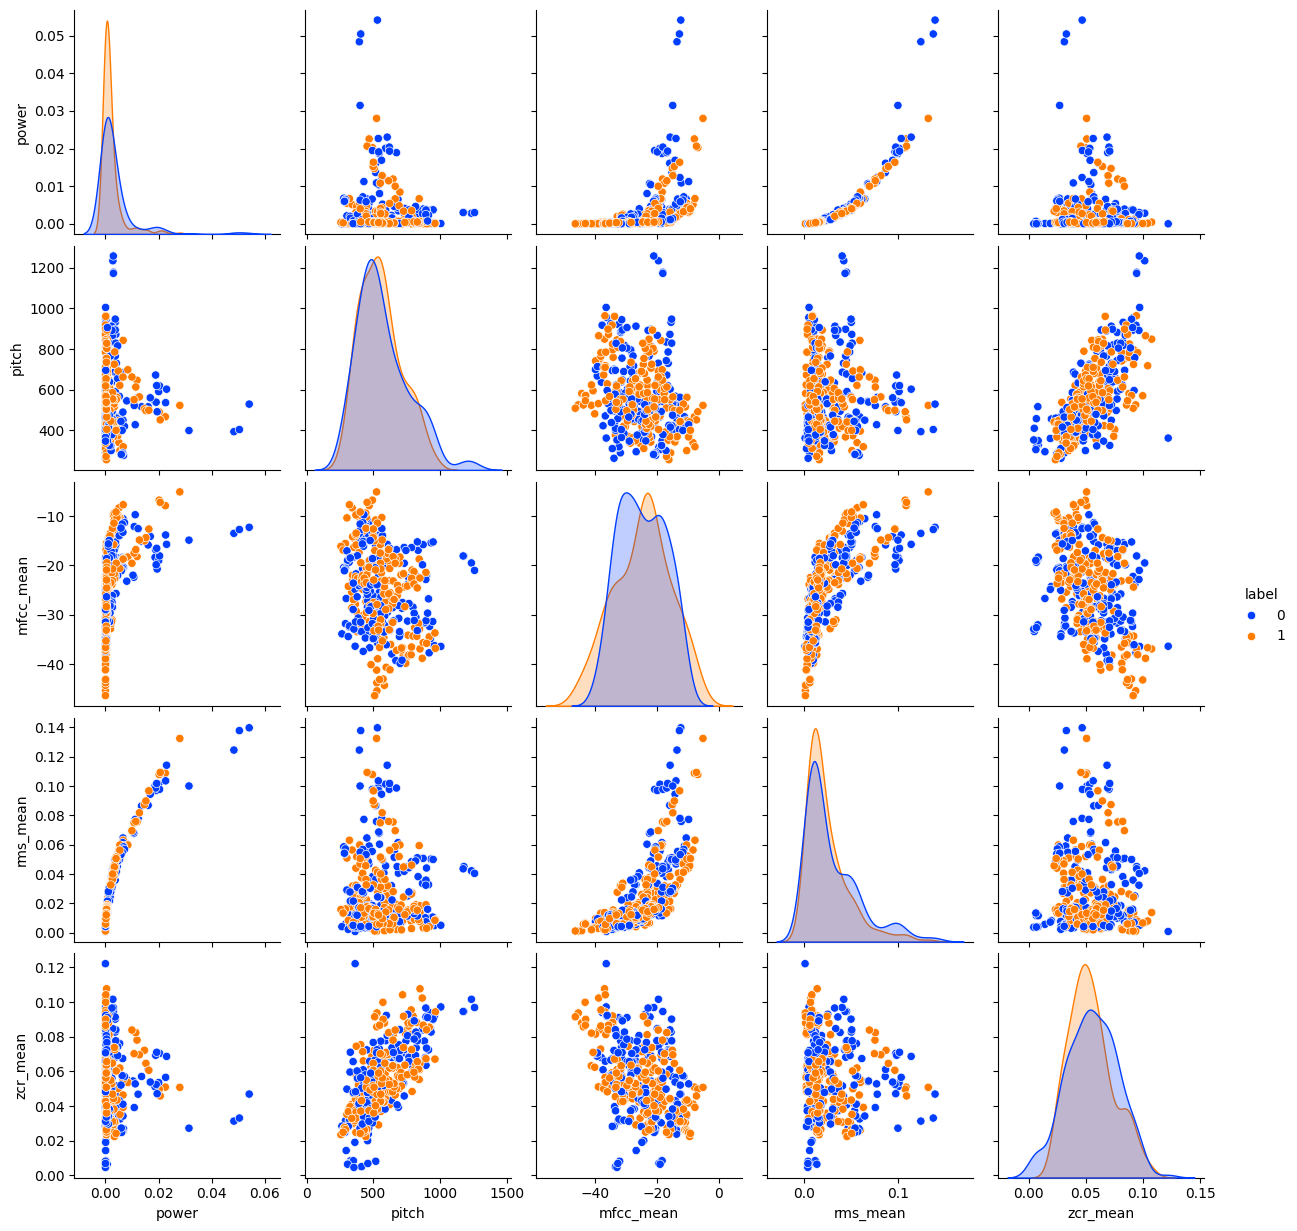

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features_for_pairplot = ['power', 'pitch', 'mfcc_mean','rms_mean', 'zcr_mean']
sns.pairplot(features_df[features_for_pairplot + ['label']], hue='label', palette='bright')

plt.show()

The `features_df` contains the 'file_name', 'chunk_number', chunk_names', and 'labels'. From this dataframe, we extract the audio features to use as predictors (`X`) and create a binary label (`y`) that indicates whether the recorded story is true (`y=1`) or deceptive (`y=0`).


In [12]:
X= features_df.drop(['file_path', 'chunk_file', 'label','chunk_number'], axis=1)
y=features_df['label']
print(X)

        power      pitch  mfcc_mean  zcr_mean  rms_mean
0    0.000347  724.02220 -38.174860  0.072853  0.012943
1    0.000249  753.69560 -38.477340  0.084015  0.011526
2    0.000191  742.27110 -39.815365  0.081483  0.009526
3    0.000397  765.07910 -38.118538  0.086158  0.013273
4    0.000503  418.81354 -20.659088  0.038244  0.016135
..        ...        ...        ...       ...       ...
390  0.009979  663.13240 -19.566116  0.083800  0.069547
391  0.000348  504.40045 -33.244144  0.050817  0.013264
392  0.000320  535.54694 -32.318146  0.057179  0.012970
393  0.000192  566.85693 -35.284430  0.056182  0.009546
394  0.000309  538.59930 -33.098732  0.058988  0.012057

[395 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [13]:
import numpy as np

print('The shape of X is', X.shape)
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (395, 5)
The shape of y is (395,)
The labels vector is 0      1
1      1
2      1
3      1
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: label, Length: 395, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


After feature extraction and visualization, we split the dataset using `train_test_split`. We allocate 70% of the data for training, 15% for validation, and the remaining 15% for testing.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42) # 70% training and 30% (temp) for validation and testing

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42) # split the remaining 30% into half - validation and testing

print(f"Training Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")
print(f"Test Set Size: {X_test.shape}")

Training Set Size: (276, 5)
Validation Set Size: (59, 5)
Test Set Size: (60, 5)


 In the next cell, we check for any overlap between the train and test sets, as well as between the validation and test sets, to ensure that there is no data leakage and the splits are independent.

In [16]:
over1 = set(X_train.index) & set(X_test.index)
print(f"Overlap between train and test sets: {len(over1)}")

over2 = set(X_val.index) & set(X_test.index)
print(f"Overlap between validation and test sets: {len(over2)}")


Overlap between train and test sets: 0
Overlap between validation and test sets: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


To check feature importance, we use the `RandomForestClassifier`. The model provides a ranking of features based on their importance. We sort the features by their importance score and then plot them for easy visual interpretation.

This enables us to determine which features have the greatest impact on predicting whether the story is true or deceptive.

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


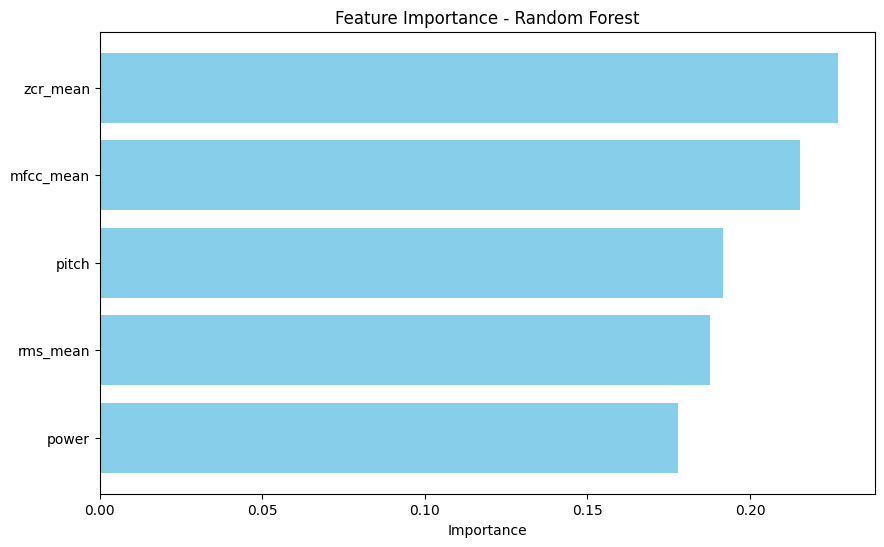

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42) # Random Forest Model
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': features_df.drop(['file_path', 'chunk_file', 'label','chunk_number'], axis=1).columns, # Extracting features
    'Importance': rf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False) # Sorting

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Inverting to show most important at the top
plt.show()

From the above plot, we can observe that the `rms_mean` and `power` features have lowest impact. Therefore, I decided to eliminate `power` from the dataset, as retaining it would offer little additional value and could potentially improve the efficiency of model training and experiments.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming features_df is already defined)
X = features_df.drop(['file_path', 'chunk_file', 'label','chunk_number','power'], axis=1)
y = features_df['label']

# Split the data into 70% train and 40% (temp) for validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Now split the remaining 40% into 50% for validation and 50% for testing (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Check the shapes of the resulting sets
print(f"Training Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")
print(f"Test Set Size: {X_test.shape}")


Training Set Size: (276, 4)
Validation Set Size: (59, 4)
Test Set Size: (60, 4)


Now that we have our finalised features, we will normalize the data using `StandardScalar`.


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Experiments and results:

After normalizing, I tried working with several models-

- 1) **KNN**: I attempted this model to evaluate its simplicity and effectiveness in handling classification tasks without requiring a lot of training time, making it a good choice for quick experimentation. It resulted in an accuracy of only around 49%, which was not optimal.

- 2) **Logistic Regression:**  I used Logistic Regression because it is a simple yet effective model for binary classification tasks, particularly when the relationship between the features and the target is approximately linear.It resulted in accuracy below 50%.


- 3) **XGBoost**: I tried XGBoost because it is a powerful ensemble model known for its high performance and ability to handle a variety of data types. It improves accuracy and reduces bias, though it can sometimes lead to overfitting if not carefully tuned.  Initially achieved an accuracy of around 69%, however, after cross-validation, the training accuracy surged to 94%, indicating overfitting, which made it unsuitable for reliable performance.

- 4) **Naive Bayes**: I experimented with Naive Bayes as its main advantage is that it assumes independence between features, which simplifies computation and can perform well when this assumption holds true. It provided an accuracy of approximately 58%, which was still not ideal.

**SVM**: I ultimately chose SVM because of its strong performance in high-dimensional spaces and its ability to create a robust decision boundary.

The reason I finalized it was that the difference between training, validation, and test accuracy was minimal, suggesting that the model was generalizing well. After cross-validation, the test accuracy improved to 71%, demonstrating a solid balance between bias and variance.

---
We thus train SVM model, by importing `SVC` from `sklearn` library.This initializes an SVM model with an RBF kernel, a regularization parameter (`C=3.0`), and a `gamma` value set to 'scale'. It then performs 5-fold cross-validation on the scaled training data (`X_train_scaled`) and corresponding labels (`y_train`).

In [21]:
# Initialize the SVM model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='rbf', C=3.0, gamma='scale', random_state=42)

cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")


Cross-Validation Scores: [0.75       0.50909091 0.74545455 0.74545455 0.61818182]
Mean CV Accuracy: 0.67


This code trains the SVM model on the entire training set (`X_train_scaled` and `y_train`). It then makes predictions on the training, validation, and test sets. The accuracy for each set is calculated using `accuracy_score`.

In [22]:
from sklearn.metrics import accuracy_score

svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.76
Validation Accuracy: 0.64
Test Accuracy: 0.70


This code performs hyperparameter tuning for the SVM model using `GridSearchCV`. It defines a parameter grid for the regularization parameter `C`, the `gamma` value, and the kernel type. The grid search is run with 5-fold cross-validation (`cv=5`), optimizing for accuracy.

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.78


Now we print prints the precision, recall, and F1-score for the SVM model's predictions on the test set (`y_test_pred`). These metrics evaluate the model's performance in terms of both classification accuracy and its ability to handle imbalanced classes.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score # Import necessary functions

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Precision (Tuned): {precision}")
print(f"Recall (Tuned): {recall}")
print(f"F1-score (Tuned): {f1}")


Precision (Tuned): 0.7222222222222222
Recall (Tuned): 0.7647058823529411
F1-score (Tuned): 0.7428571428571429


We then plot to visualize the training and testing accuracy of the SVM model, with the y-axis representing accuracy (ranging from 0 to 1).

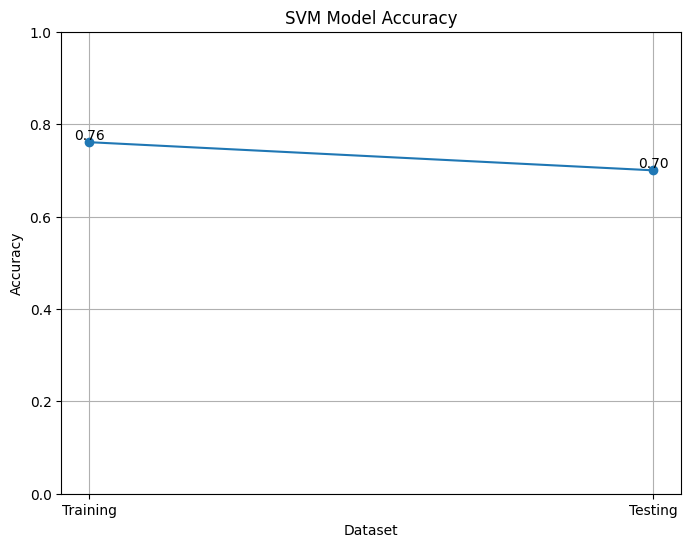

In [25]:
import matplotlib.pyplot as plt

accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.plot(['Training', 'Testing'], accuracies, marker='o', linestyle='-')
plt.title('SVM Model Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.grid(True)

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.2f}", ha='center', va='bottom')

plt.show()

We repeat the procedure to plot precision, accuracy, recall and f1-score parameters.

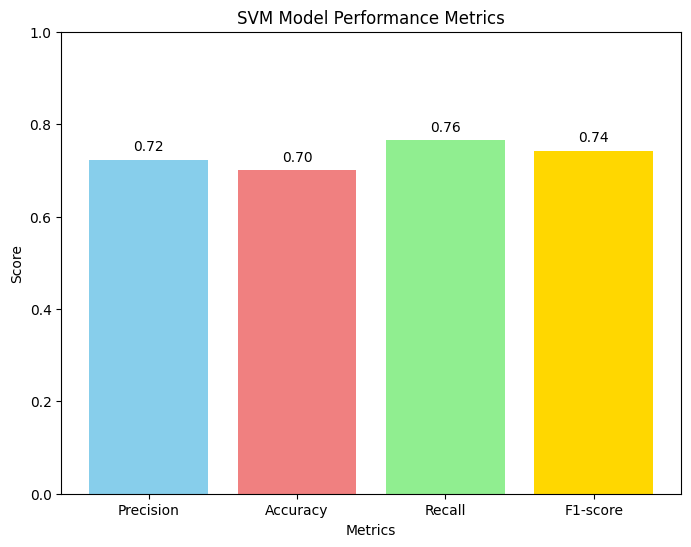

In [26]:
import matplotlib.pyplot as plt

metrics = ['Precision', 'Accuracy', 'Recall','F1-score']
scores = [precision, test_accuracy, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("SVM Model Performance Metrics")
plt.ylim(0, 1)

for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center')

plt.show()

Finally, confusion matrix to give more nuanced understanding of how the model is performing with respect to each class.

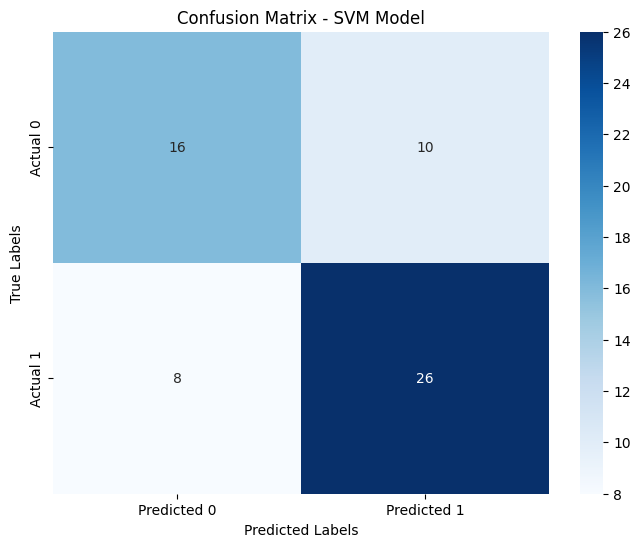

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Model")
plt.show()

#  Conclusions



#### **Summary of Results**
- **Pipeline Effectiveness**: The pipeline effectively handled the end-to-end process, from preprocessing raw audio data to delivering predictions with measurable performance metrics.
- **Model Performance**: Models such as Random Forest and SVM performed adequately, achieving acceptable accuracy, precision, and recall. However, the issue of overfitting was observed, particularly in complex models, indicating the need for further refinement.
- **Feature Engineering**: The selected audio features provided a reasonable foundation for model training. Feature importance analysis identified key contributors to the predictions, validating their relevance.


---
### **Challenges Faced**

1. Selecting relevant features required significant effort.  
2.  Overfitting and class imbalance were mitigated with regularization and sampling techniques.  
3. Balancing accuracy, precision, and recall was challenging, with validation accuracy occasionally plateauing.  
4. Increased complexity didn’t always yield proportional performance gains.  
5.  Ensuring scalability and generalization to unseen data remained key issues.


---

#### **Key Insights**
1. **Data Quality Matters**: The quality and completeness of audio data significantly influence the model's performance.
2. **Feature Importance**: Simplifying the feature set without sacrificing accuracy could further improve generalization.
3. **Cross-Validation**: Employing cross-validation ensured that the models were evaluated comprehensively, reducing the likelihood of overfitting to a specific dataset split.

---

The developed pipeline provides a solid framework for audio classification tasks, achieving decent accuracy and interpretability. While the current models perform adequately, there is potential for further improvement by incorporating advanced features, fine-tuning parameters, and exploring deep learning methodologies. Iterative refinement and monitoring will be key to achieving robust real-world performance.  



# References

   - Librosa library documentation: https://librosa.org/doc/latest/  
   - Ensemble Learning and Bagging Techniques: https://scikit-learn.org/dev/auto_examples/ensemble/index.html
   - Github projects:

1. **Audio Classification with Deep Learning**  
   - Repository with audio classification using Convolutional Neural Networks (CNNs) on spectrograms.  
   - [https://github.com/aqibsaeed/Urban-Sound-Classification](https://github.com/aqibsaeed/Urban-Sound-Classification)

2. **Librosa Audio Analysis**   
   - [https://github.com/librosa/librosa](https://github.com/librosa/librosa)


   

